<a href="https://colab.research.google.com/github/BeMindYou/Lesson/blob/main/Assessment_Tools/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек:
Импортируем необходимые библиотеки: pandas для работы с данными, matplotlib и seaborn для визуализации данных, scipy.stats для анализа нормального распределения.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


# Чтение данных из CSV файла:

In [3]:
# Загрузка нашего DataFrame Pandas
file_path = '/content/USDT_faucetpay.csv'
data = pd.read_csv(file_path)

# Просмотр первых нескольких строк данных, чтобы понять структуру таблицы
data.head()

,DATA,DEPOSIT,BET_PLAYED,HIGHEST_BET,TOTAL_BET,WINS,LOSSES,NET_PROFIT,Base_Bet_Amount,Net_Profit_Is_Below
0,09.06.2024,0.102959,100.0,0.00000,NaN,NaN,NaN,0,NaN,NaN
1,09.06.2024,0.103239,100.0,0.00064,NaN,NaN,NaN,0.00028,0.000005,-0.16383
2,09.06.2024,0.100804,100.0,0.00128,NaN,NaN,NaN,-0.002435,0.000005,-0.16383
3,09.06.2024,0.101024,100.0,0.00032,NaN,NaN,NaN,0.00022,0.000005,-0.16383
4,09.06.2024,0.101304,100.0,0.00032,NaN,NaN,NaN,0.00028,0.000005,-0.16383


# Преобразование даты (при необходимости):
Если в данных есть колонка с датой, преобразуем ее в тип datetime для дальнейшего использования. Этот шаг закомментирован, так как он не всегда необходим.

In [ ]:
# data['DATA'] = pd.to_datetime(data['DATA'], format='%d.%m.%Y')


# Построение графика для столбца DEPOSIT:

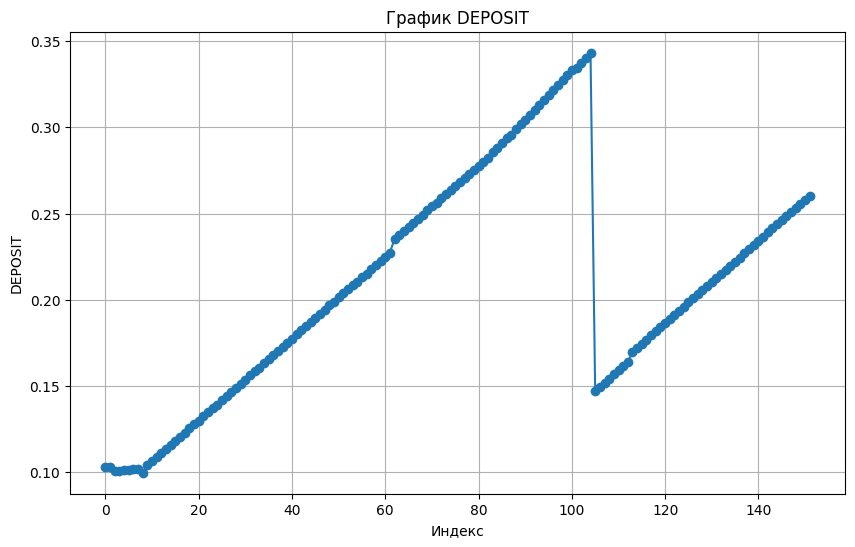

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(data['DEPOSIT'], marker='o')
plt.title('График DEPOSIT')
plt.xlabel('Индекс')
plt.ylabel('DEPOSIT')
plt.grid(True)
plt.show()

# Построение графиков нормального распределения для каждой колонки:
Для каждого столбца из списка columns_to_plot строим гистограмму с линией KDE (Kernel Density Estimation). Также вычисляем параметры нормального распределения (среднее и стандартное отклонение) и строим соответствующую кривую плотности вероятности.

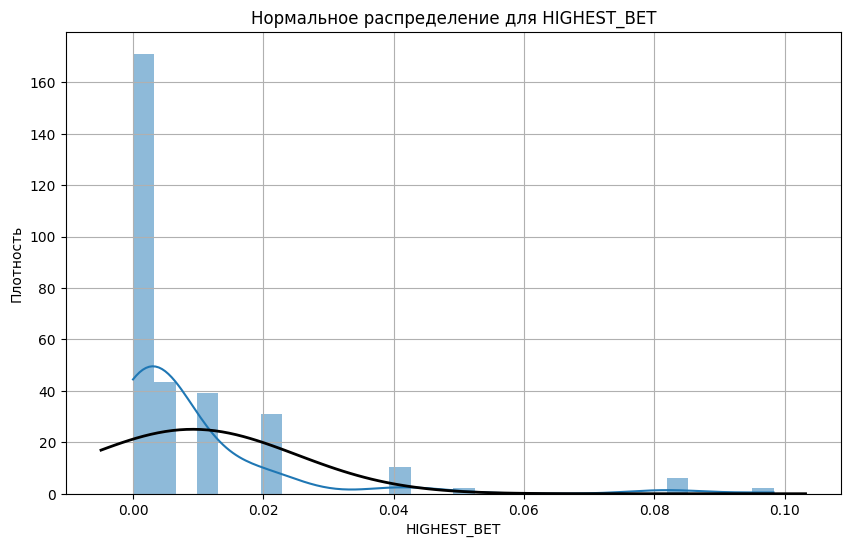

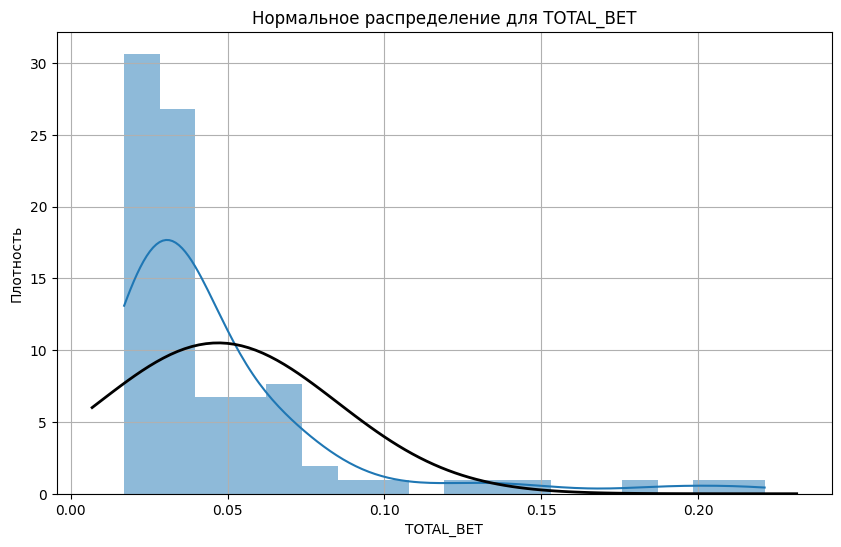

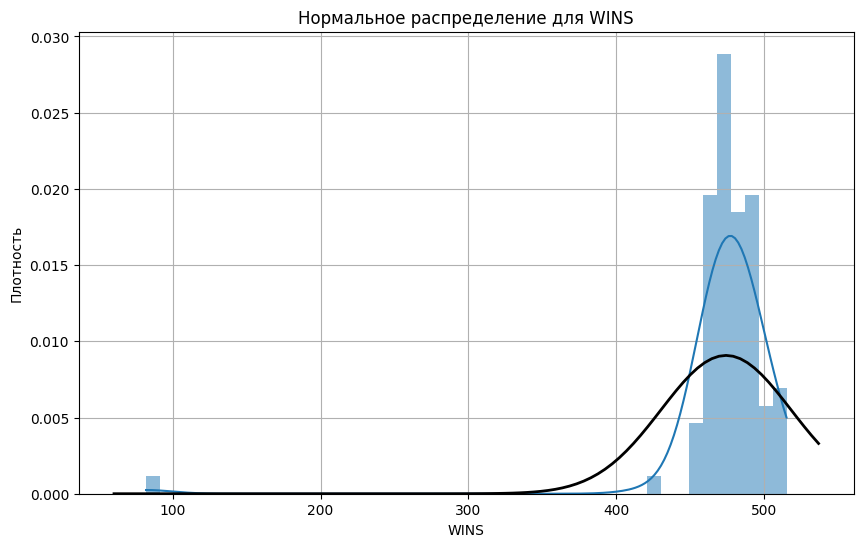

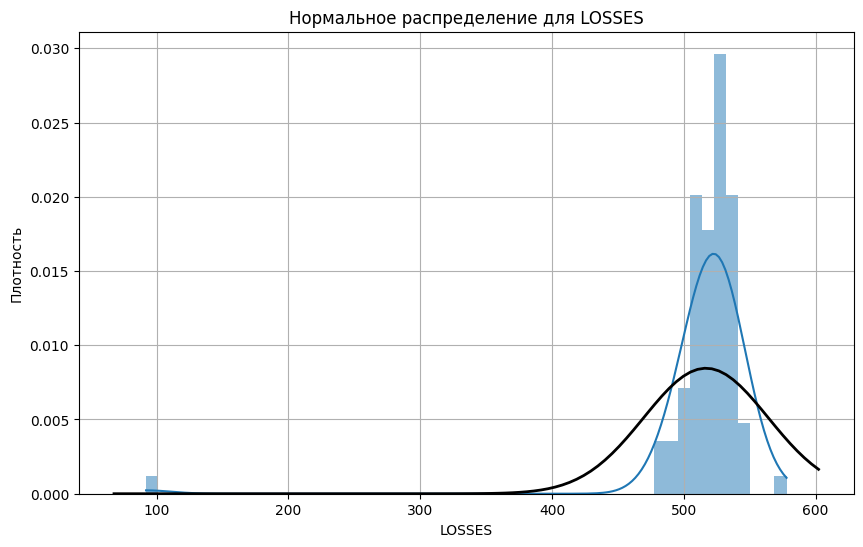

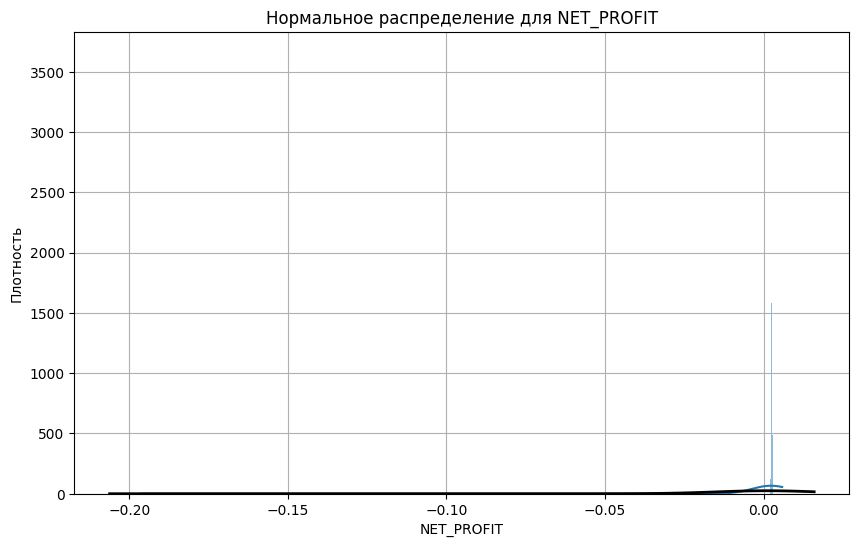

In [5]:
# Определение правильных названий столбцов
columns_to_plot = ['HIGHEST_BET', 'TOTAL_BET', 'WINS', 'LOSSES', 'NET_PROFIT']
for column in columns_to_plot:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Проверка наличия столбца в данных
    if column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column].dropna(), kde=True, stat="density", linewidth=0)

        # Расчет параметров нормального распределения
        mu, std = stats.norm.fit(data[column].dropna())
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)

        plt.plot(x, p, 'k', linewidth=2)
        title = f'Нормальное распределение для {column}'
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Плотность')
        plt.grid(True)
        plt.show()
    else:
        print(f"Столбец {column} отсутствует в данных")